<a href="https://colab.research.google.com/github/shakib68/EDA-hotel-booking/blob/main/capstone_hotel_booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project contains the real world data record of hotel bookings of a city and a resort hotel containing details like bookings,cancellations, guest details etc.**
**Main aim of the project is to understand and visualize dataset from hotel and customer point of  view.**

**1 Reasons for booking cancellations across various parameters**
**2 best time to book hotel**
**3 peak season**

**Loading all important Libraries**

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the data from the drive
Booking_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone project 1/Copy of Hotel Bookings.csv')

**Data inspection**

In [6]:
Booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
Booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
Booking_df.shape

(119390, 32)

In [9]:
Booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
Booking_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


**Thought Processing of Problem**


Which are the variable which plays important role

Analyse different dataset to get a brief of hotel booking

**Handling Missing Data**

In [11]:
# Missing Value Count Function
def show_missing():
    missing = Booking_df.columns[Booking_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(Booking_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(Booking_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(Booking_df)*100,2))

Missing Data Count
company     112593
agent        16340
country        488
children         4
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
company     94.31
agent       13.69
country      0.41
children     0.00
dtype: float64


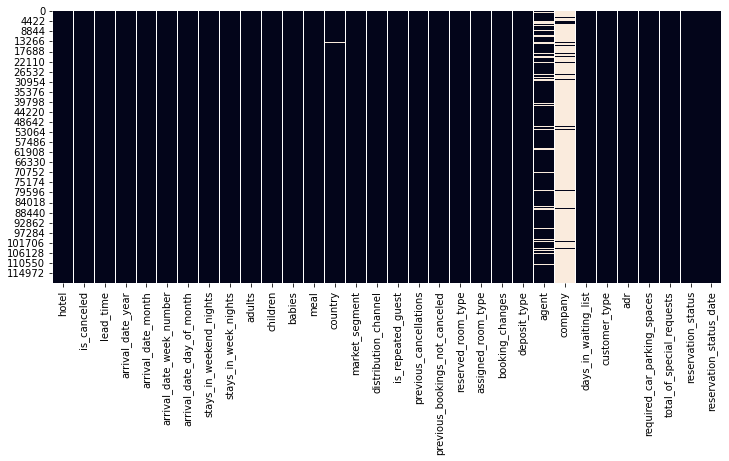

In [12]:
# plotting the data with respect to analyse null values in the data
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(Booking_df.isnull(), cbar=False)

**We will remove the column which have more than 50% missing data**

In [13]:
Booking_df.drop(['company'],inplace=True ,axis=1)

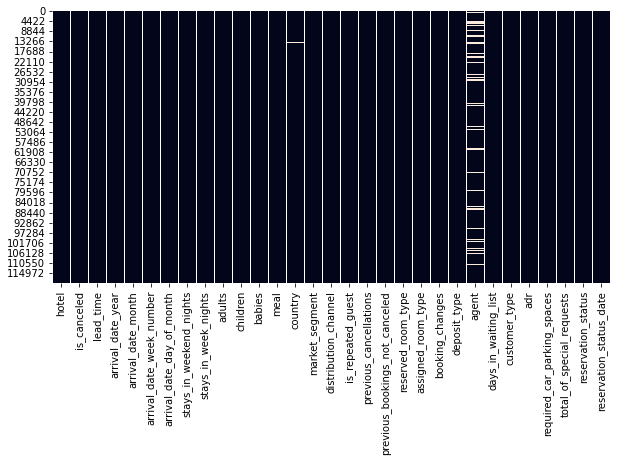

In [14]:
# plot of the null values afer removal of the null values 
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(Booking_df.isnull(), cbar=False)

In [15]:
Booking_df['agent'].fillna(0.0, inplace=True)

In [16]:
#Filling the null values with '0' as the respective columns only contains the id of the agent and company
Booking_df['country'].fillna(Booking_df.country.mode().to_string(), inplace=True)

In [17]:
Booking_df['children'].fillna(round(Booking_df.children.mean()), inplace=True)

In [18]:
Booking_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [19]:

Booking_df['country'].fillna(Booking_df.country.mode().to_string(), inplace=True)

In [20]:
Booking_df['country'].isnull().sum()

0

In [21]:
# Missing Value Count Function
def show_missing():
    missing = Booking_df.columns[Booking_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(Booking_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(Booking_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(Booking_df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [22]:
Booking_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Checking if any row have 0 guests ,it means hotel is not booked

In [23]:
Booking_df[(Booking_df['adults']==0) & (Booking_df['children']==0) & (Booking_df['babies']== 0)].shape

(180, 31)

In [24]:
Booking_df = Booking_df.drop(Booking_df[(Booking_df['adults']==0) & (Booking_df['children']==0) & (Booking_df['babies']== 0)].index)

In [25]:
Booking_df.shape

(119210, 31)

**Here we have done with data pre-processing and cleaning.**

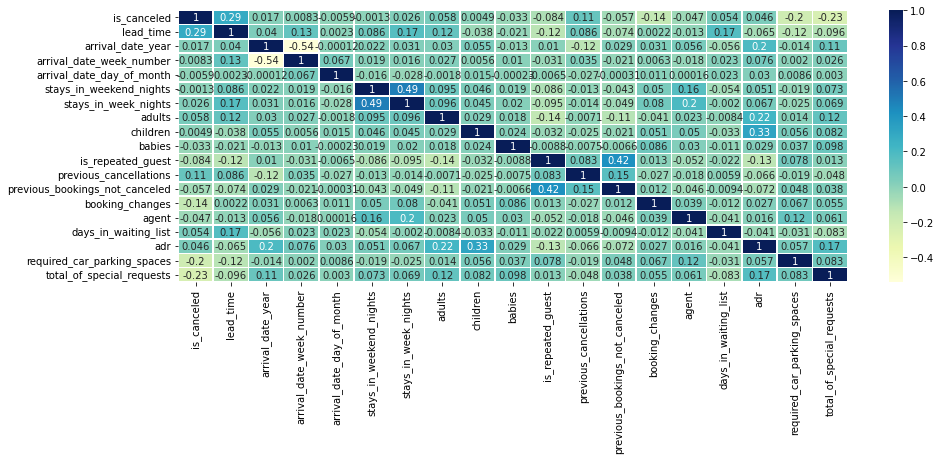

In [26]:
# correlation graph of the data
fig, ax = plt.subplots(figsize=(15,5))
dataplot = sns.heatmap(Booking_df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

  
# displaying heatmap
plt.show()

**groupby on countries to count top tourist origin**

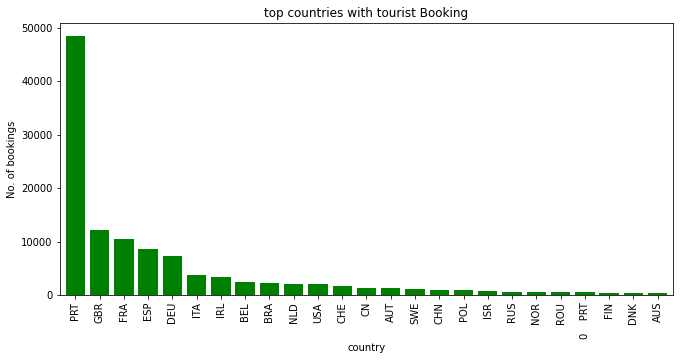

In [27]:

df=Booking_df['country'].value_counts().head(25)

 
# creating the bar plot
df.plot(kind='bar',width=.8 ,color=['green'],figsize=(11, 5))

# kegends of the plot
plt.xlabel("country")
plt.ylabel("No. of bookings")
plt.title("top countries with tourist Booking")

# display of the plot
plt.show()

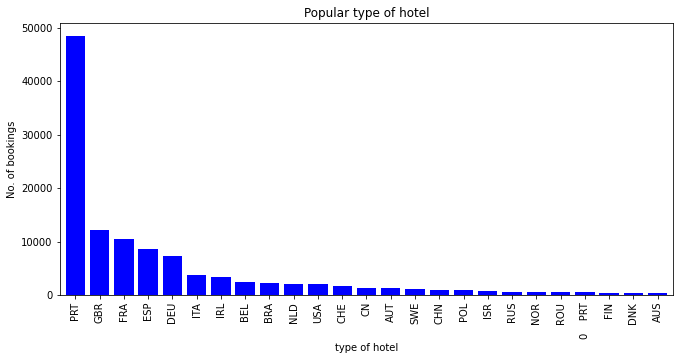

In [28]:
 #Bar plot
df.plot(kind='bar',width=.8 ,color=['blue'],figsize = (11, 5))

# legends for the plot

plt.xlabel("type of hotel")
plt.ylabel("No. of bookings")
plt.title("Popular type of hotel")

# Displaying the plot
plt.show()

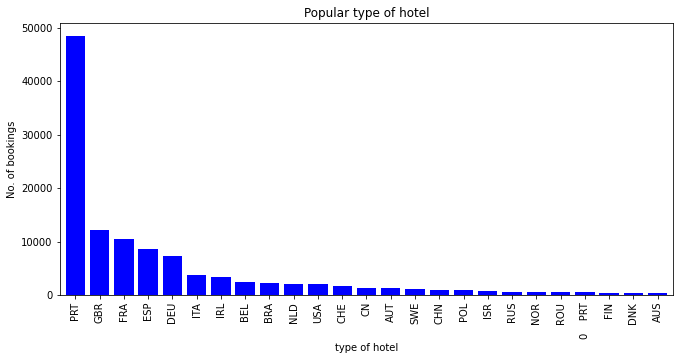

In [30]:
  
# creating the bar plot
df.plot(kind='bar',width=.8 ,color=['blue'],figsize = (11, 5))

# legends for the plot

plt.xlabel("type of hotel")
plt.ylabel("No. of bookings")
plt.title("Popular type of hotel")

# Displaying the plot
plt.show()

**most popular type of hotel**

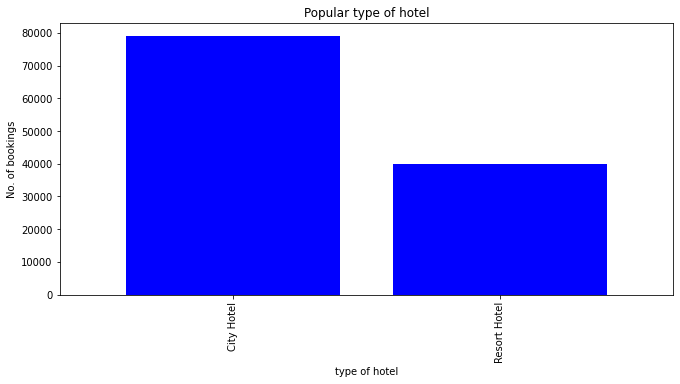

In [32]:
 

df=Booking_df['hotel'].value_counts()

 
# creating the bar plot
df.plot(kind='bar',width=.8 ,color=['blue'],figsize = (11, 5))

# legends for the plot

plt.xlabel("type of hotel")
plt.ylabel("No. of bookings")
plt.title("Popular type of hotel")

# Displaying the plot
plt.show()

**Booking from the different segment types**

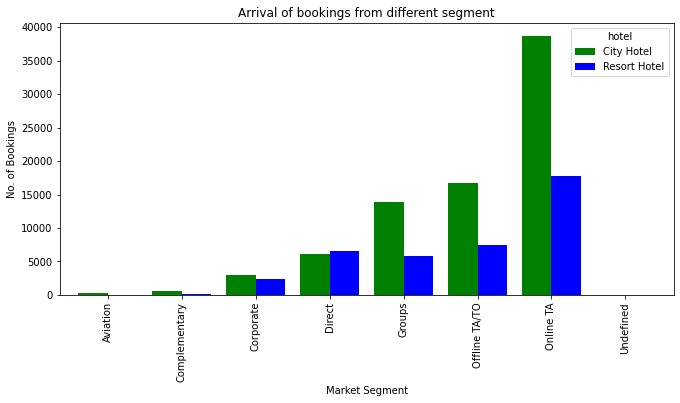

In [33]:

df=Booking_df.groupby(['hotel','market_segment']).agg(count=('hotel','size'))

# reset index
df=df.reset_index()
df=df.sort_values(by=['market_segment'], inplace=False, ascending=True)

# pivoting the table 
df=df.pivot(index='market_segment',columns='hotel',values='count')

# filling the some na values with 0
df=df.fillna(0)

# plotting the bar graph
df.plot(kind='bar',width=.8 ,color=['green','blue'],figsize = (11, 5))

# legends of the plot
plt.xlabel("Market Segment")
plt.ylabel("No. of Bookings")
plt.title("Arrival of bookings from different segment")

# Displaying the plot
plt.show()

**counting the number of customers who canceled with type of deposit**

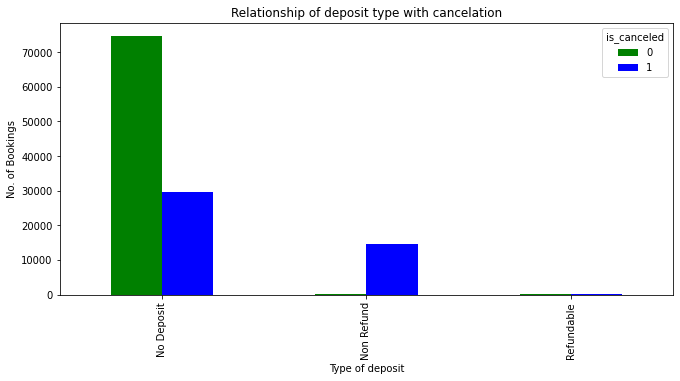

In [34]:

df=Booking_df.groupby(['is_canceled','deposit_type']).agg(count=('is_canceled','size'))
df=df.reset_index()

# pivoting the table
df=df.pivot(index='deposit_type',columns='is_canceled',values='count')

# ploting the bar graph
df.plot(kind='bar',width=.5 ,color=['green','blue'],figsize = (11,5))

# legends of the plot
plt.xlabel("Type of deposit")
plt.ylabel("No. of Bookings")
plt.title("Relationship of deposit type with cancelation")

# dsiplaying the plot
plt.show()

**percentage of each type of deposit**

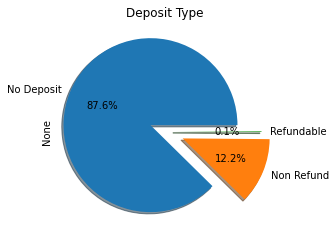

In [42]:

df=Booking_df.groupby(['deposit_type']).size()

# plotting the bar graph 
plot = df.plot.pie(y='deposit_type', title="Deposit Type", legend=False, autopct='%1.1f%%', explode=(0.18, 0.22, 0.11), shadow=True, startangle=0)

**comparing the month with respect to bookings**

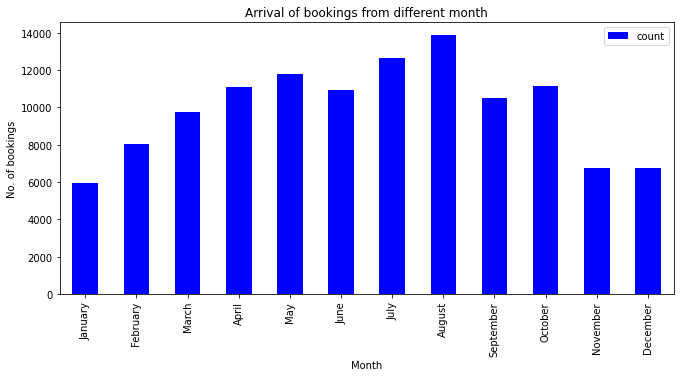

In [44]:

df=Booking_df.groupby(['arrival_date_month']).agg(count=('hotel','count')).sort_values(by='arrival_date_month',ascending=False)
df=df.reset_index()

# sorting the dataframe from random month to calender wise month
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df.index=pd.CategoricalIndex( df['arrival_date_month'],categories=months,ordered=True )

df=df.sort_index().reset_index(drop=True)

df.set_index('arrival_date_month',inplace=True)

# ploting the bar graph
df.plot(kind='bar',width=.5 ,color=['blue'],figsize = (11, 5))

# legends of the plot
plt.xlabel("Month")
plt.ylabel("No. of bookings")
plt.title("Arrival of bookings from different month")

#displaying the plot
plt.show()
